En este trabajo, se ve representado una red neuronal que clasifica numeros escritos a mano. Es decir, se muestra una foto del número escrito a mano, y mediante esta red la vamos entrenando para que pueda acertar que número es y que sea correcto.

Importamos todas las librerias e importes que nos van a ayudar para hacer la red neuronal

In [10]:
from __future__ import absolute_import, division, print_function, unicode_literals
!pip3 install keras-visualizer

import tensorflow as tef
import tensorflow_datasets as tnsfds

import math
import numpy as np
import matplotlib.pyplot as mplt
import logging
logger = tef.get_logger()

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Activation
from keras_visualizer import visualizer 
from keras.utils.vis_utils import plot_model
from keras import models, layers  
from IPython.display import display, Image

logger.setLevel(logging.ERROR)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Tensor Flow tiene incluídos los set de datos y metadatos dentro de su librería, asi queda importarlo. La libería que trae todos estos datos es "mnist". Además, a cada uno de las respuestas posibles (en este caso los números) les ponemos un texto para identificarlo (fácil, a cada uno le ponemos el nombre de número que le corresponde)

In [11]:
dataset, metadata = tnsfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

class_names = [
    'cero', 'uno', 'dos', 'tres', 'cuatro', 'cinco', 'seis',
    'siete', 'ocho', 'nueve'
]

prueba = metadata.splits['train'].num_examples
test = metadata.splits['test'].num_examples
print(prueba, test)

60000 10000


Ahora se normalizan los datos, es decir, en vez de que los píxeles de la imagen sean del 0 al 255, sean del 0 al 1. (se divide el número entre 255). Después, le damos esta función a los datasets.



In [13]:
def normalize(images, labels):
    images = tef.cast(images, tef.float32)
    images /= 255
    return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

# Le asignamos las neuronas a nuestras distintas capas:
Primera capa de la red le asignamos 784 neuronas, ya que queremos que tenga 28x28(cuadrado). 
Dos capas densas de 64 neuronas cada una. Con relu ya que son ocultas
Capa de salida donde hay 10 neuronas para cada posible respuesta. Con softmax ya que es de clasificación.

Luego con el modelo 'adam' compilamos y guardamos esa precisión(accuracy) para  mostrarla y mejorarla.

In [14]:
model = tef.keras.Sequential([
	tef.keras.layers.Flatten(input_shape=(28,28,1)),
	tef.keras.layers.Dense(60, activation=tef.nn.relu),
	tef.keras.layers.Dense(60, activation=tef.nn.relu),
	tef.keras.layers.Dense(10, activation=tef.nn.softmax)
 ])

model.compile(
	optimizer='adam',
	loss='sparse_categorical_crossentropy',
	metrics=['accuracy']
)

# Entrenamiento
 En esta parte se entrena al modelo, como dijimos antes. 
 Primero definimos la cantidad de aprendizajes o ejemplos por lote (batchsize), en este caso 32. Luego cuantas vueltas completas se harán al dataset durante el entrenamiento.

In [15]:
BATCHSIZE = 32
train_dataset = train_dataset.repeat().shuffle(prueba).batch(BATCHSIZE)
test_dataset = test_dataset.batch(BATCHSIZE)

model.fit(
	train_dataset, epochs=5,
	steps_per_epoch=math.ceil(prueba/BATCHSIZE) 
)

Epoch 1/5
1875/1875 [==============================] - 20s 6ms/step - loss: 0.9459 - accuracy: 0.7085
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4550 - accuracy: 0.8662
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3665 - accuracy: 0.8920
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3263 - accuracy: 0.9054
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2990 - accuracy: 0.9144


# Evaluación: 
Luego de entrenar a la red, usamos esos datos para ver que tan preciso es y que tan bien fue ese entrenamiento. Al finalizar, se imprimen esos datos en pantalla.

In [16]:
test_loss, test_accuracy = model.evaluate(
	test_dataset, steps=math.ceil(test/32)
)
print("Test Loss: {}, Precisión: {}".format(test_loss, test_accuracy))

313/313 [==============================] - 2s 5ms/step - loss: 0.2872 - accuracy: 0.9167
Test Loss: 0.2871891260147095, Precisión: 0.916700005531311


Ahora pasamos nuestra red a codigo para que se pueda visualizar con gráficos. Estos graficos se demuestran de manera que aparece el número escrito a mano, y el número que nuestra red entrenada predijo. A su lado, vemos si fue acertada o no. 
 

1/1 [==============================] - 0s 59ms/step


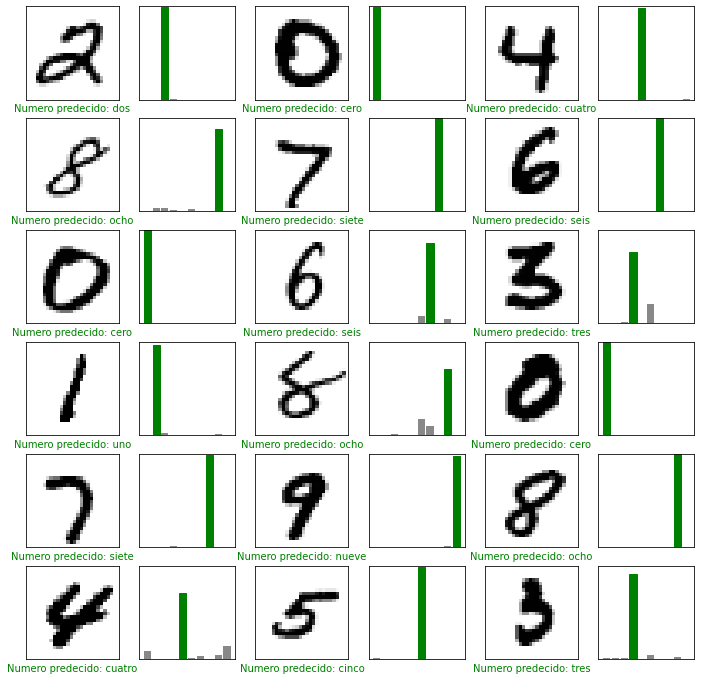

In [17]:
for test_images, test_labels in test_dataset.take(1):
	test_images = test_images.numpy()
	test_labels = test_labels.numpy()
	predictions = model.predict(test_images)
 
def plot_image(i, predictions_array, true_labels, images):
	predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
	mplt.grid(False)
	mplt.xticks([])
	mplt.yticks([])

	mplt.imshow(img[...,0], cmap=mplt.cm.binary)

	predicted_label = np.argmax(predictions_array)
	if predicted_label == true_label:
		color = 'green'
	else:
		color = 'red'

	mplt.xlabel("Numero predecido: {}".format(class_names[predicted_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
	predictions_array, true_label = predictions_array[i], true_label[i]
	mplt.grid(False)
	mplt.xticks([])
	mplt.yticks([])
	thisplot = mplt.bar(range(10), predictions_array, color="#888888")
	mplt.ylim([0,1])
	predicted_label = np.argmax(predictions_array)

	thisplot[predicted_label].set_color('red')
	thisplot[true_label].set_color('green')

numrows=6
numcols=3
numimages = numrows*numcols

mplt.figure(figsize=(2*2*numcols, 2*numrows))
for i in range(numimages):
	mplt.subplot(numrows, 2*numcols, 2*i+1)
	plot_image(i, predictions, test_labels, test_images)
	mplt.subplot(numrows, 2*numcols, 2*i+2)
	plot_value_array(i, predictions, test_labels)

mplt.show()